In [49]:
# Data Setup and Cleaning

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

df = pd.read_csv('raw-keywords-12-30-19.csv')
df.head(1)

,Alpha Clicks,Alpha Conversions,Compiled,Beta Impressions,Beta Clicks,Compiled.1,Search term,Match type,Added/Excluded,Campaign,...,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Conversions,Cost / conv.,Conv. rate,Campaign type
0,Flag,Flag,FlagFlag,Flag,NaN,Flag,blueboard,Exact match,Added,Google_Search_Brand_AllGeos_Alpha,...,282,1148,0.25,USD,0.28,80.32,6,13.39,0.02,Search


In [6]:
df = df[['Search term', 'Match type',
       'Added/Excluded', 'Campaign', 'Type', 'Ad group', 'Clicks', 'Impr.', 'Avg. CPC', 'Cost', 'Conversions']]

### Alpha Beta Charlie Performance

In [7]:
from pandas import pivot_table
abc = pivot_table(df, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Type', aggfunc = sum)
abc = abc[['Impr.','Clicks','Conversions','Cost']]
abc['CTR'] = round((abc['Clicks']/abc['Impr.'])*100,2)
abc['CR'] = round((abc['Conversions']/abc['Clicks'])*100,2)
abc['CPA'] = round((abc['Cost']/abc['Conversions']),2)
abc = abc[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
abc

,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
Type,,,,,,,
Alpha,19579,10.52,2059,0.92,19,5344.56,281.29
Beta,11190,35.13,3931,0.94,37,11948.45,322.93
Charlie,7713,54.79,4226,0.83,35,8481.19,242.32


____________________________________________________________________________

### Charlie Keywords that Converted

In [8]:
charlie = df[df['Type']=='Charlie']
charlie[charlie['Conversions'] > 0]

,Search term,Match type,Added/Excluded,Campaign,Type,Ad group,Clicks,Impr.,Avg. CPC,Cost,Conversions
59,www peopleareeverything com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Rewards,40,77,1.59,63.67,2
106,www awardselect com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,8,36,1.86,14.86,1
164,employee bonus ideas,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Incentive,4,12,2.43,9.73,1
173,https crothallgem workstride com ng login_claim,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,7,10,1.88,13.16,1
210,www hertzcognitions awardco com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,5,3,1.44,7.21,1
213,employee appreciation trip companies,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,1,1,4.67,4.67,2
357,dc37 reward com,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Rewards,3,3,1.38,4.13,1
636,employer gifts,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Gifts,1,5,1.18,1.18,1
731,www awardselect com dupagemedical15,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Recognition,2,4,1.31,2.62,1
1187,high five rewards,Broad match,None,Google_Search_NB_AllGeos_Charlie,Charlie,Rewards,1,2,1.74,1.74,1


________________________________________________________________________________________

### Alpha Performance

In [9]:
alpha = df[df['Type']=='Alpha']
ag_alpha = pivot_table(alpha, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
ag_alpha = ag_alpha[['Impr.','Clicks','Conversions','Cost']]
ag_alpha['CPA'] = round(ag_alpha['Cost']/ag_alpha['Conversions'],2)
ag_alpha['CTR'] = round((ag_alpha['Clicks']/ag_alpha['Impr.'])*100,2)
ag_alpha['CR'] = round((ag_alpha['Conversions']/ag_alpha['Clicks'])*100,2)
ag_alpha = ag_alpha[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
ag_alpha.sort_values('Conversions',ascending=False,inplace=True)
#fix index
ag_alpha = pd.DataFrame(ag_alpha)
ag_alpha['adgroup']=ag_alpha.index
ag_alpha = ag_alpha.reset_index(drop=True)
ag_alpha=ag_alpha[['adgroup','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]

Create a heatmap of how Ad Groups have been performing with conversion rate listed on the plot (and colored) and number of clicks along the x-axis.

Text(0.5, 1, 'Clicks x Conversion Rate Alpha Heatmap')

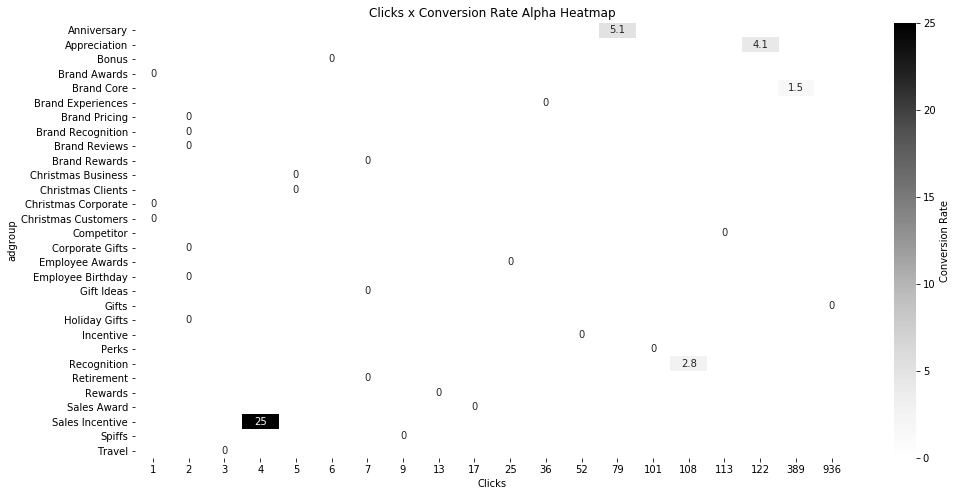

In [10]:
plt.figure(figsize=(16, 8))
sns.heatmap(ag_alpha.pivot("adgroup","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Alpha Heatmap')

`Gifts`,`Competitors`, and `Perks` are all problem campaigns.

Look into `Sales Incentive` and see if we can get more impressions.

________________________________________________________________________________

### Campaign Performance

In [11]:
campaign = pivot_table(df, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Campaign', aggfunc = sum)
campaign = campaign[['Impr.','Clicks','Conversions','Cost']]
campaign['CPA'] = round(campaign['Cost']/campaign['Conversions'],2)
campaign['CTR'] = round((campaign['Clicks']/campaign['Impr.'])*100,2)
campaign['CR'] = round((campaign['Conversions']/campaign['Clicks'])*100,2)
campaign = campaign[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
campaign.sort_values('Conversions',ascending=False,inplace=True)
#fix index
campaign = pd.DataFrame(campaign)
campaign['Campaign']=campaign.index
campaign = campaign.reset_index(drop=True)
campaign=campaign[['Campaign','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
campaign['CPA'] = campaign['CPA'].fillna(1000)
campaign

,Campaign,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
0,Google_Search_NB_AllGeos_Charlie,7713,54.79,4226,0.83,35,8481.19,242.32
1,Google_Search_NB_AllGeos_Beta,6877,41.02,2821,0.92,26,8437.70,324.53
2,Google_Search_NB_AllGeos_Alpha,15596,9.52,1484,0.88,13,4114.10,316.47
3,Google_Search_NB_Resources_Beta,3953,23.96,947,1.16,11,2742.58,249.33
4,Google_Search_Brand_AllGeos_Alpha,1916,22.91,439,1.37,6,318.59,53.10
5,Google_Search_Brand_AllGeos_Beta,268,51.49,138,0.00,0,607.59,inf
6,Google_Search_NB_Client_Holiday_Gifts_Alpha,126,18.25,23,0.00,0,105.96,inf
7,Google_Search_NB_Client_Holiday_Gifts_Beta,92,27.17,25,0.00,0,160.58,inf
8,Google_Search_NB_Competitor_AllGeos_Alpha,1941,5.82,113,0.00,0,805.91,inf


Text(0.5, 1, 'Clicks x Conversion Rate Alpha Heatmap')

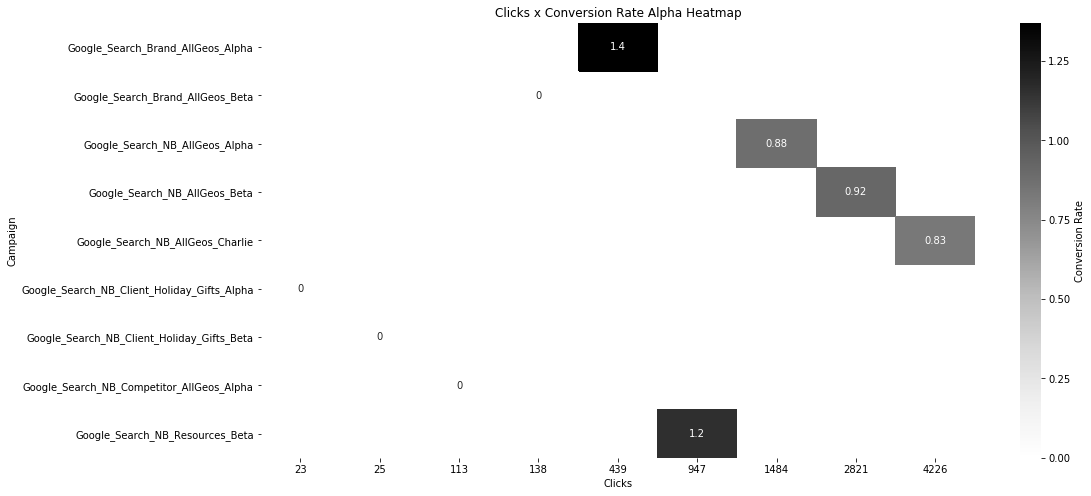

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(campaign.pivot("Campaign","Clicks","CR"), cmap="Greys", annot=True, cbar_kws={'label': 'Conversion Rate'})
plt.title('Clicks x Conversion Rate Alpha Heatmap')

### Next Steps
* Add the ads worksheet

# Ad Analysis

In [13]:
ads = pd.read_csv("ads-1-2-20.csv")
ads = ads[['Headline 1','Headline 2','Headline 3','Description','Description 2','Campaign','Ad group','Clicks','Impr.','Cost','Conversions']]
ads['Cost'] = ads['Cost'].str.replace(',','')
ads['Cost'] = ads['Cost'].astype(float)
ads.head()

,Headline 1,Headline 2,Headline 3,Description,Description 2,Campaign,Ad group,Clicks,Impr.,Cost,Conversions
0,DKI,Give Better. Get Better.,A Better Way to Reward Talent,Blueboard Makes Giving Meaningful Gifts at Sca...,Gift Hand-Curated Experiences That Create Last...,Google_Search_NB_AllGeos_Alpha,Rewards,3,43,13.32,0
1,Blueboard Experiential Rewards,Motivating Spiff Rewards,A Better Way to Reward Talent,"Cash Bonuses Aren't Motivating, Crush Quotas w...",Employee Appreciation Rewards to Keep your Emp...,Google_Search_NB_AllGeos_Charlie,Spiffs,0,2,0.00,0
2,DKI,Give Better. Get Better.,A Better Way to Reward Talent,Blueboard Makes Giving Meaningful Gifts at Sca...,Gift Hand-Curated Experiences That Create Last...,Google_Search_NB_AllGeos_Charlie,Travel,2,72,4.68,0
3,Blueboard Spiff Program,Rewards That Turn OOO to OMG.,A Better Way to Reward Talent,Give Your Rockstars the Rockstar Treatment Wit...,Excite Your Employees With One-Of-A-Kind to On...,Google_Search_NB_AllGeos_Charlie,Spiffs,1,27,1.76,0
4,Unique Gifts For Employees,Celebrate Your Best Employees,Employee Gift Ideas,Your Employees Want Experiences. Let Them Choo...,Reward Top Talent with an Experience - Spa Day...,Google_Search_NB_AllGeos_Alpha,Gifts,565,5975,969.92,0


In [60]:
ads

,Headline 1,Headline 2,Headline 3,Description,Description 2,Campaign,Ad group,Clicks,Impr.,Cost,Conversions
0,DKI,Give Better. Get Better.,A Better Way to Reward Talent,Blueboard Makes Giving Meaningful Gifts at Sca...,Gift Hand-Curated Experiences That Create Last...,Google_Search_NB_AllGeos_Alpha,Rewards,3,43,13.32,0
1,Blueboard Experiential Rewards,Motivating Spiff Rewards,A Better Way to Reward Talent,"Cash Bonuses Aren't Motivating, Crush Quotas w...",Employee Appreciation Rewards to Keep your Emp...,Google_Search_NB_AllGeos_Charlie,Spiffs,0,2,0.00,0
2,DKI,Give Better. Get Better.,A Better Way to Reward Talent,Blueboard Makes Giving Meaningful Gifts at Sca...,Gift Hand-Curated Experiences That Create Last...,Google_Search_NB_AllGeos_Charlie,Travel,2,72,4.68,0
3,Blueboard Spiff Program,Rewards That Turn OOO to OMG.,A Better Way to Reward Talent,Give Your Rockstars the Rockstar Treatment Wit...,Excite Your Employees With One-Of-A-Kind to On...,Google_Search_NB_AllGeos_Charlie,Spiffs,1,27,1.76,0
4,Unique Gifts For Employees,Celebrate Your Best Employees,Employee Gift Ideas,Your Employees Want Experiences. Let Them Choo...,Reward Top Talent with an Experience - Spa Day...,Google_Search_NB_AllGeos_Alpha,Gifts,565,5975,969.92,0
5,Blueboard Employee Gifts,Give Better. Get Better.,A Better Way to Reward Talent,Blueboard Makes Giving Meaningful Gifts at Sca...,Gift Hand-Curated Experiences That Create Last...,Google_Search_NB_AllGeos_Alpha,Gifts,30,775,75.73,0
6,DKI,Rewards That Wow,A Better Way to Reward Talent,Give Your Rockstars the Rockstar Treatment Wit...,Excite Your Employees With One-Of-A-Kind to On...,Google_Search_NB_AllGeos_Alpha,Spiffs,4,121,24.79,0
7,Blueboard Employee Rewards,Reward with Blueboard,A Better Way to Reward Talent,Blueboard Is An Experiential Rewards Platform ...,Employee Appreciation Rewards to Keep your Emp...,Google_Search_Brand_AllGeos_Alpha,Brand Reviews,0,4,0.00,0
8,Blueboard Incentive Travel,Give Better. Get Better.,A Better Way to Reward Talent,Blueboard Makes Giving Meaningful Gifts at Sca...,Gift Hand-Curated Experiences That Create Last...,Google_Search_NB_AllGeos_Beta,Travel,5,145,33.13,1
9,DKI,Rewards That Wow,A Better Way to Reward Talent,Give Your Rockstars the Rockstar Treatment Wit...,Excite Your Employees With One-Of-A-Kind to On...,Google_Search_NB_AllGeos_Beta,Celebrate Employee,0,1,0.00,0


h1

In [40]:
h1 = pivot_table(ads, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Headline 1', aggfunc = sum)
h1 = h1[['Impr.','Clicks','Conversions','Cost']]
h1['CTR'] = round((h1['Clicks']/h1['Impr.'])*100,2)
h1['CR'] = round((h1['Conversions']/h1['Clicks'])*100,2)
h1['CPA'] = round((h1['Cost']/h1['Conversions']),2)
h1 = h1[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
h1.sort_values('Impr.',ascending=False,inplace=True)
#Fix index
def h1_index(aa):
    aa=pd.DataFrame(aa)
    aa['Headline 1']=aa.index
    aa=aa.reset_index(drop=True)
    aa=aa[['Headline 1','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
    
h1_conv = h1[(h1['Conversions']>0)&(h1['Conversions']<26)]
h1_index(h1_conv)

h1_nonconv=h1[(h1['Conversions']==0)]
h1_index(h1_nonconv)

h1 = pd.DataFrame(h1)
h1['Headline 1']=h1.index
h1 = h1.reset_index(drop=True)
h1=h1[['Headline 1','Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
h1

,Headline 1,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
0,DKI,77888,5.04,3925,0.66,26,8383.36,322.44
1,Unique Gifts For Employees,16602,7.78,1291,0.23,3,2092.91,697.64
2,How to Motivate Employees,7965,6.57,523,1.15,6,1369.23,228.20
3,Blueboard Employee Recognition,7480,4.22,316,3.48,11,1603.58,145.78
4,Employee Referral Program,6852,3.18,218,0.92,2,562.35,281.17
5,Blueboard Employee Gifts,6613,3.90,258,0.39,1,586.84,586.84
6,Blueboard Employee Rewards,6291,9.01,567,0.88,5,1281.16,256.23
7,Blueboard Employee Awards,6271,2.98,187,0.00,0,635.79,inf
8,Employee Anniversary Gifts,5881,6.78,399,2.51,10,1198.09,119.81
9,Employee Appreciation Gifts,4279,5.00,214,1.40,3,535.68,178.56


<IPython.core.display.Javascript object>


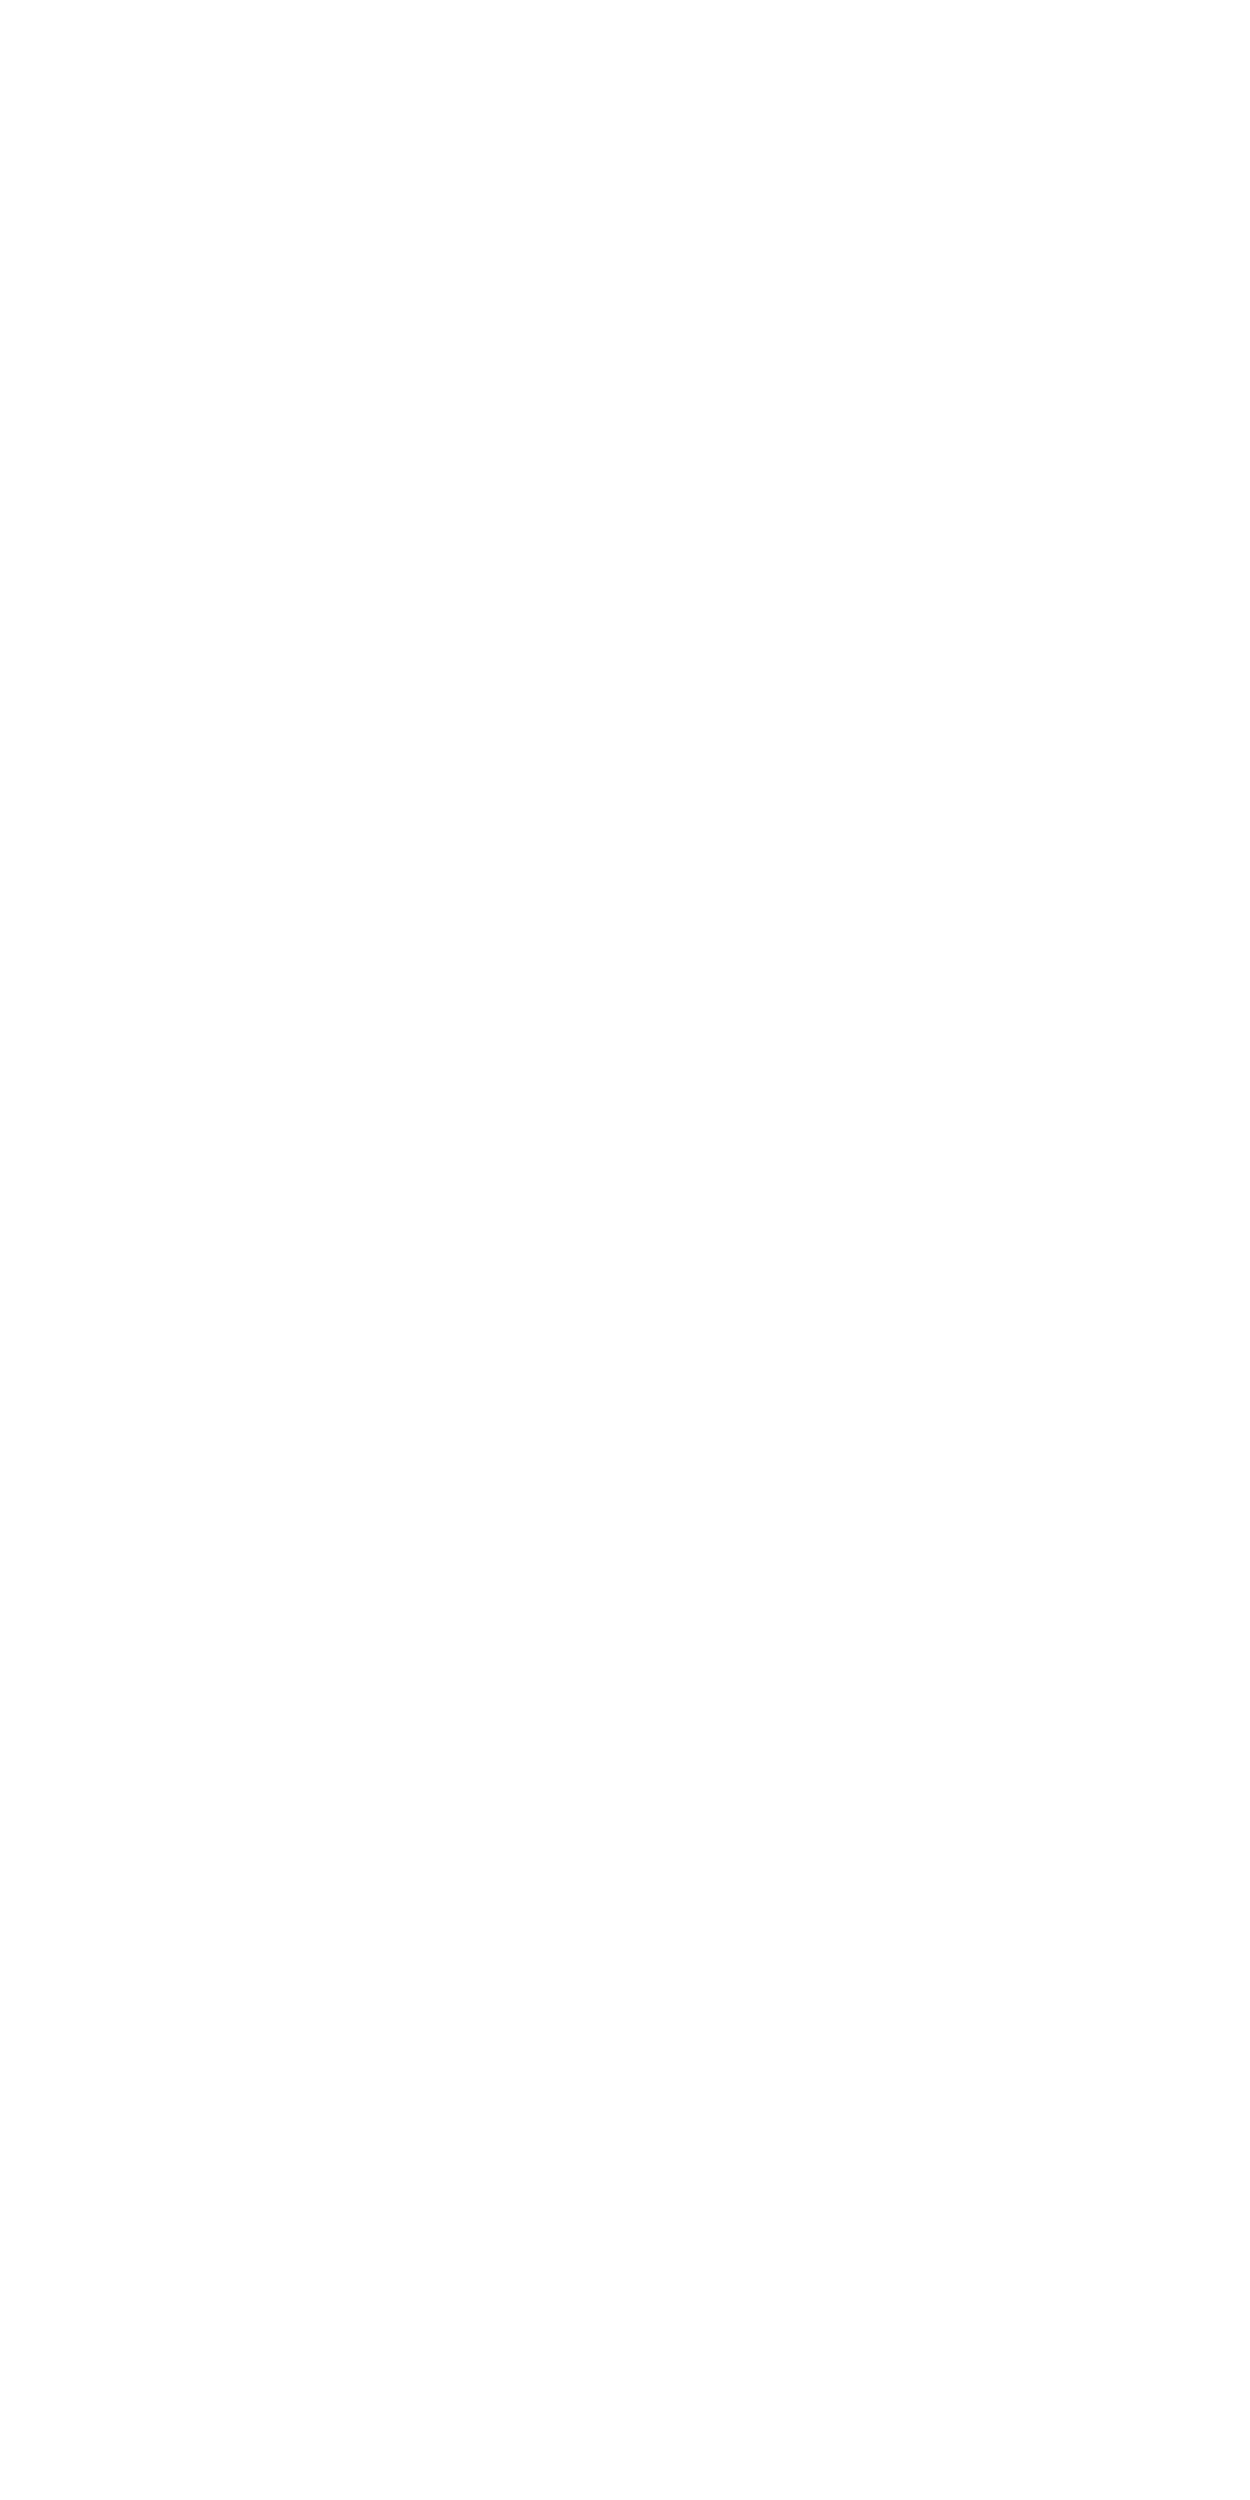

<IPython.core.display.Javascript object>


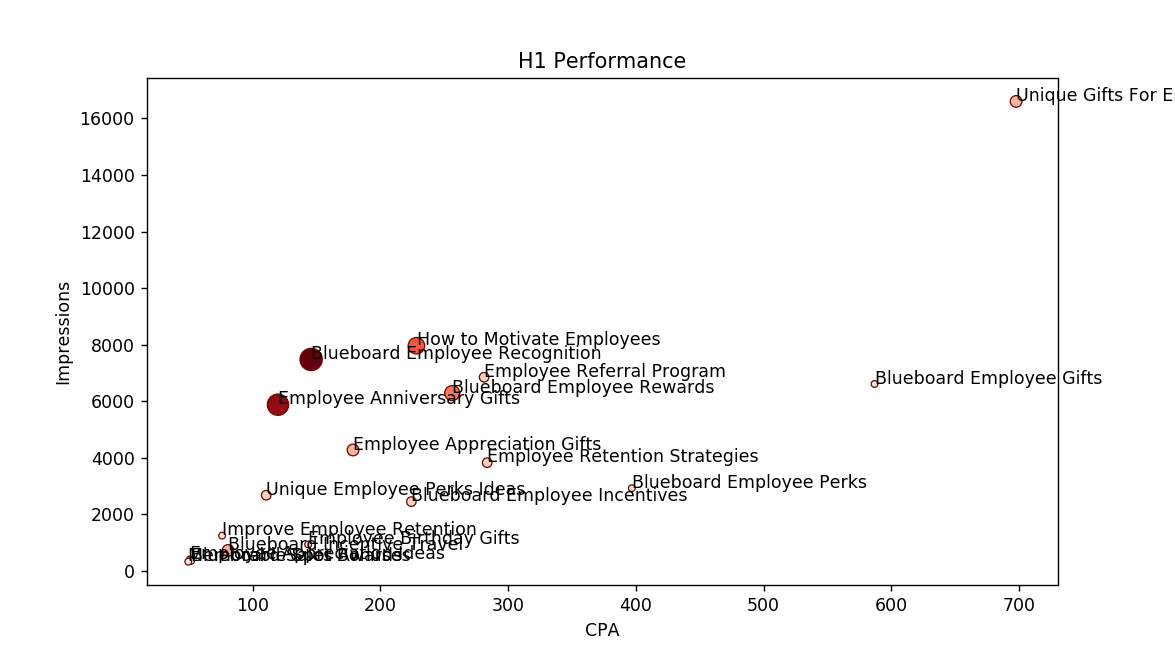

Text(0.5, 1.0, 'H1 Performance')

In [59]:
plt.figure(figsize=(10, 20))
fig, ax =plt.subplots()
h1_plot = ax.scatter(h1_conv['CPA'], h1_conv['Impr.'],s=h1_conv['Conversions']*15, c=h1_conv['Conversions'],cmap=plt.cm.Reds,vmin=0,vmax=h1_conv['Conversions'].max(),edgecolor="#6b0c08", linewidth=.75)
for _, row in h1_conv.iterrows():
    xy = row[['CPA','Impr.']]
    xytext = xy + (.1,10) 
    ax.annotate(row['Headline 1'], xy, xytext)
plt.xlabel('CPA')
plt.ylabel('Impressions')
plt.title('H1 Performance')
#plt.show()

#h1.plot.scatter(x='CPA',y='Impr.',s=)

In [42]:
h1_nonconv

,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA,Headline 1
Headline 1,,,,,,,,
Blueboard Employee Awards,6271,2.98,187,0.0,0,635.79,inf,Blueboard Employee Awards
How to Build Employer Brand,2620,2.63,69,0.0,0,273.08,inf,How to Build Employer Brand
Inspire Employee Motivation,1373,5.75,79,0.0,0,212.84,inf,Inspire Employee Motivation
Unique Employee Incentives,1233,3.73,46,0.0,0,121.18,inf,Unique Employee Incentives
Engage Millennials at Work,1068,4.78,51,0.0,0,156.90,inf,Engage Millennials at Work
Blueboard Retirement Gifts,999,2.30,23,0.0,0,45.70,inf,Blueboard Retirement Gifts
A Better Way to Reward Talent,749,4.14,31,0.0,0,223.09,inf,A Better Way to Reward Talent
Blueboard Referral Program,571,3.50,20,0.0,0,61.55,inf,Blueboard Referral Program
Motive Your Remote Workforce,537,1.49,8,0.0,0,33.31,inf,Motive Your Remote Workforce


In [16]:
adg = pivot_table(ads, values = ('Impr.','Clicks','Conversions','Cost'), index = 'Ad group', aggfunc = sum)
adg = adg[['Impr.','Clicks','Conversions','Cost']]
adg['CTR'] = round((adg['Clicks']/adg['Impr.'])*100,2)
adg['CR'] = round((adg['Conversions']/adg['Clicks'])*100,2)
adg['CPA'] = round((adg['Cost']/adg['Conversions']),2)
adg = adg[['Impr.','CTR','Clicks','CR','Conversions','Cost','CPA']]
adg.sort_values('Impr.',ascending=False,inplace=True)
adg

,Impr.,CTR,Clicks,CR,Conversions,Cost,CPA
Ad group,,,,,,,
Gifts,30437,6.39,1946,0.21,4,3268.20,817.05
Recognition,25522,6.10,1556,1.22,19,4021.80,211.67
Referral,18057,3.23,584,0.68,4,1557.39,389.35
Perks,12866,4.30,553,1.08,6,1432.08,238.68
Anniversary,10775,5.42,584,1.71,10,1597.24,159.72
Incentive,10739,3.96,425,0.94,4,1292.90,323.23
Employee Awards,9818,3.14,308,0.00,0,849.87,inf
Rewards,9374,6.83,640,1.09,7,1604.14,229.16
employee motivation,9338,6.45,602,1.00,6,1582.07,263.68


In [ ]:
# Look at this video when creating chart: https://www.youtube.com/watch?v=yejsG6TKWNU

<IPython.core.display.Javascript object>


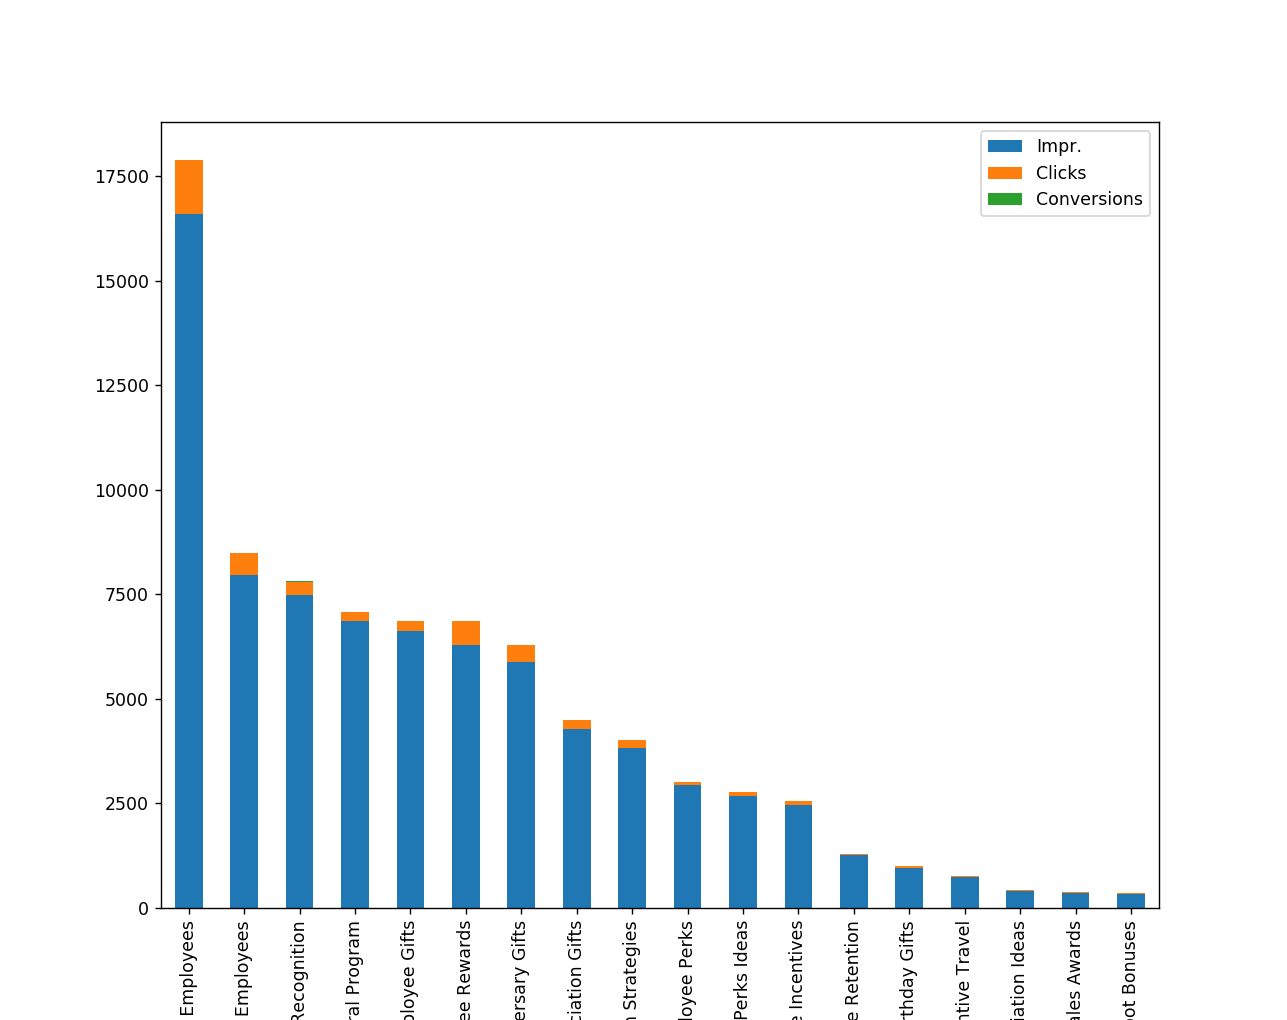

In [66]:
h1_conv[['Impr.','Clicks','Conversions']].plot.bar(stacked=True, figsize=(10,7))
plt.show()